In [1]:
import torchvision

from torchvision.transforms import v2
from torchvision import tv_tensors

#from torchvision import datapoints

import torch
import cv2
import numpy as np

import scipy

import glob
import os

import time

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
# ВОПРОС ВОПРОСОВ: В КАКОЙ ФОРМЕ ПОТРЕБЛЯЮТСЯ НЕЙРОСЕТЬЮ И ВЫВОДЯТСЯ ДАННЫЕ? (с т.з. порядка кадров и каналов...)

In [2]:
def read_video_frames_opencv(path_to_video):
    cap = cv2.VideoCapture(path_to_video)
    frames_list = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames_list.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    #return torch.tensor(np.array(frames_list).transpose(0, 3, 1, 2))
    #return tv_tensors.Video(np.array(frames_list).transpose(0, 3, 1, 2))
    return np.array(frames_list)#)#.transpose(0, 3, 1, 2)

In [69]:
path_to_video

'C:\\Users\\admin\\python_programming\\DATA\\AVABOS\\trash_to_train_on_video\\mHOd2VUSCvo(+)_._720.066-720.086_._NOAGGR.mp4'

In [71]:
cap = cv2.VideoCapture(path_to_video)
#cap.get(cv2.CAP_PROP_FRAME_COUNT)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    print(frame.shape)
cap.release()

In [67]:
frames = read_video_frames_opencv(path_to_video)
frames

[]

In [3]:
paths_to_videos_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video\*.mp4')
paths_to_audios_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_audio\*.wav')
paths_to_audios_list[0], paths_to_videos_list[0]

('C:\\Users\\admin\\python_programming\\DATA\\AVABOS\\trash_to_train_on_audio\\-kpsb88q2ac(+)_._0.066-10.066_._NOAGGR.wav',
 'C:\\Users\\admin\\python_programming\\DATA\\AVABOS\\trash_to_train_on_video\\-kpsb88q2ac(+)_._0.066-10.066_._NOAGGR.mp4')

In [26]:
frames = read_video_frames_opencv(paths_to_videos_list[0])
frames.shape

(301, 270, 480, 3)

In [27]:
frames = torch.as_tensor(frames.transpose(0, 3, 1, 2))
frames.shape

torch.Size([301, 3, 270, 480])

In [28]:
tv_frames = tv_tensors.Video(frames)

In [29]:
resizer = v2.Resize(size=(224, 224), antialias=True)
tv_frames = resizer(tv_frames)
tv_frames.shape, frames.shape

(torch.Size([301, 3, 224, 224]), torch.Size([301, 3, 270, 480]))

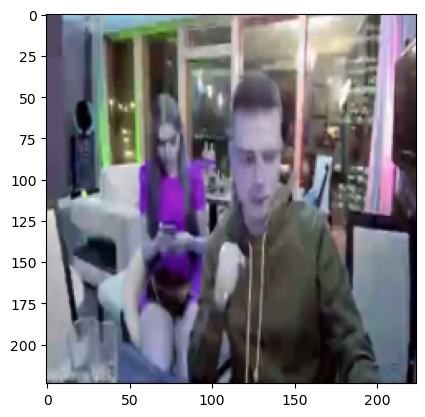

In [33]:
plt.imshow(tv_frames.numpy().transpose(0, 2, 3, 1)[0])

torch.Size([301, 3, 270, 480])
torch.Size([301, 3, 270, 480])
torch.Size([301, 3, 224, 224])


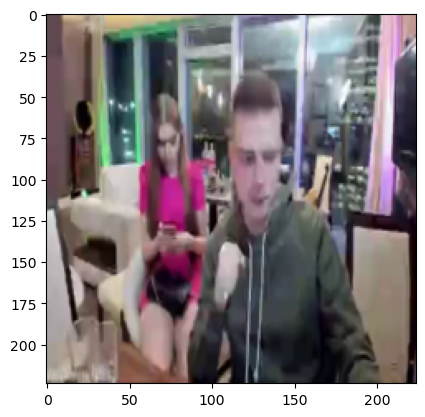

In [37]:
frames = read_video_frames_opencv(paths_to_videos_list[0])
frames = torch.as_tensor(frames.transpose(0, 3, 1, 2))
print(frames.shape)
tv_frames = tv_tensors.Video(frames)
print(tv_frames.shape)
resizer = v2.Resize(size=(224, 224), antialias=True)
tv_frames = resizer(tv_frames)
print(tv_frames.shape)
frames = tv_frames.numpy().transpose(0, 2, 3, 1)
plt.imshow(frames[0])

  0%|          | 0/2201 [00:00<?, ?it/s]

100%|██████████| 2201/2201 [32:23<00:00,  1.13it/s]


(array([   7.,    7.,    7.,    4.,   11.,    7.,  155.,    5.,  362.,
        1636.]),
 array([  0. ,  30.1,  60.2,  90.3, 120.4, 150.5, 180.6, 210.7, 240.8,
        270.9, 301. ]),
 <BarContainer object of 10 artists>)

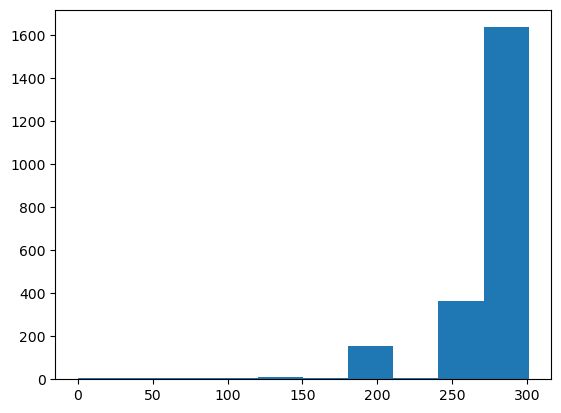

In [74]:
paths_to_videos_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video\*.mp4')

video_lengths_list = []

for path_to_video in tqdm(paths_to_videos_list):
    
    name = os.path.split(path_to_video)[1][:-4]
    path_to_save_numpy = os.path.join(path_to_numpy, name+'.npy')

    frames = read_video_frames_opencv(path_to_video)
    
    frame_num = len(frames)
    video_lengths_list.append(frame_num)

plt.hist(video_lengths_list)

In [75]:
video_lengths_list

[301,
 301,
 301,
 79,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 300,
 295,
 295,
 294,
 295,
 295,
 294,
 295,
 295,
 295,
 41,
 295,
 294,
 295,
 295,
 294,
 295,
 295,
 295,
 301,
 301,
 301,
 301,
 301,
 141,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 300,
 300,
 301,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 301,
 301,
 300,
 140,
 300,
 301,
 301,
 300,
 301,
 301,
 301,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 300,
 300,
 301,
 301,
 132,
 301,
 301,
 300,
 301,
 301,
 300,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 144,
 301,
 301,
 301,
 301,
 301,
 301,
 301,
 298,
 298,


In [11]:
paths_to_videos_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video\*.mp4')
paths_to_audios_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_audio\*.wav')

path_to_numpy = r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video_numpy'
os.makedirs(path_to_numpy, exist_ok=True)

video_lengths_list = []

for path_to_video in tqdm(paths_to_videos_list):
    
    name = os.path.split(path_to_video)[1][:-4]
    path_to_save_numpy = os.path.join(path_to_numpy, name+'.npy')

    frames = read_video_frames_opencv(path_to_video)
    
    frame_num = len(frames)
    video_lengths_list.append(frame_num)

    if frame_num == 0:
        continue
    
    if frame_num > 300:
        frames = frames[:300]
    elif frame_num < 300:
        pad_value = 300 - frame_num
        rows = frames.shape[1]
        cols = frames.shape[2]
        channels = frames.shape[3]
        canvas = np.zeros(shape=(300, rows, cols, channels), dtype=frames.dtype)
        canvas[:frame_num] = frames
        frames = canvas

    frames = frames.transpose(0, 3, 1, 2)

    frames = torch.as_tensor(frames)
    #print(frames.shape)
    tv_frames = tv_tensors.Video(frames)
    #print(tv_frames.shape)
    resizer = v2.Resize(size=(112, 112), antialias=True)
    tv_frames = resizer(tv_frames)
    #print(tv_frames.shape)
    frames = tv_frames.numpy()#.transpose(0, 2, 3, 1)

    np.save(path_to_save_numpy, frames)
    

np.load(path_to_save_numpy).shape, video_lengths_list



  0%|          | 0/2201 [00:00<?, ?it/s]

 18%|█▊        | 400/2201 [29:54<2:14:40,  4.49s/it] 


OSError: problem writing element 6406144 to file

In [16]:
npy_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video_numpy\*.npy')
idx = 35
npy_times = []
for i in range(100):
    t0 = time.time()
    frames = np.load(npy_list[idx])
    npy_times.append(time.time()-t0)

print(np.mean(npy_times))

name = os.path.split(npy_list[idx])[1][:-4] + '.mp4'
path_to_video = os.path.join(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video', name)
frames_times = []
for i in range(100):
    t0 = time.time()
    frames = read_video_frames_opencv(path_to_video)
    frames_times.append(time.time()-t0)

print(np.mean(frames_times))

0.02744727611541748
0.3672028565406799


In [ ]:
npy_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video_numpy\*.npy')
for path in tqdm(npy_list):
    frames = np.load(path)

[301, 301]

In [58]:
np.mean(video_lengths_list)

279.82884310618067

(array([  1.,   0.,   0.,   0.,   0.,   2.,   1.,   1.,   2.,   0.,   1.,
          2.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,
          4.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,
         65.,   2.,   1.,   0.,   1.,   0.,  65.,   0., 157.,   0.,  24.,
          0.,  24.,   1.,  64.,  17., 815.]),
 array([  8.  ,  13.86,  19.72,  25.58,  31.44,  37.3 ,  43.16,  49.02,
         54.88,  60.74,  66.6 ,  72.46,  78.32,  84.18,  90.04,  95.9 ,
        101.76, 107.62, 113.48, 119.34, 125.2 , 131.06, 136.92, 142.78,
        148.64, 154.5 , 160.36, 166.22, 172.08, 177.94, 183.8 , 189.66,
        195.52, 201.38, 207.24, 213.1 , 218.96, 224.82, 230.68, 236.54,
        242.4 , 248.26, 254.12, 259.98, 265.84, 271.7 , 277.56, 283.42,
        289.28, 295.14, 301.  ]),
 <BarContainer object of 50 artists>)

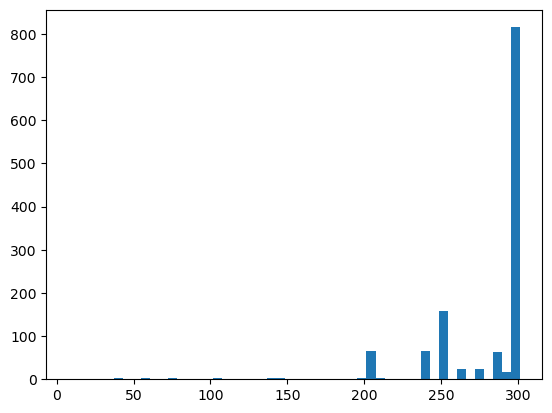

In [72]:
plt.hist(video_lengths_list, bins=50)

In [5]:
paths_to_videos_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_video\*.mp4')
paths_to_audios_list = glob.glob(r'C:\Users\admin\python_programming\DATA\AVABOS\trash_to_train_on_audio\*.wav')
times = []

# test execution time
for i in range(100):
    t0 = time.time()
    #a, b, c, = torchvision.io.read_video(paths_to_videos_list[0])
    frames = read_video_frames_opencv(paths_to_videos_list[0])
    audio = scipy.io.wavfile.read(paths_to_audios_list[0])
    audio = torch.tensor(audio[1])
    times.append(time.time()-t0)

np.mean(times)


0.2548658323287964

In [32]:
frames = read_video_frames_opencv(paths_to_videos_list[0])
frames

tensor([[[[ 81,  81,  81,  ..., 147, 147, 147],
          [ 81,  81,  81,  ..., 147, 147, 147],
          [ 81,  81,  81,  ..., 147, 147, 147],
          ...,
          [134, 181, 170,  ...,  65,  73,  74],
          [118, 136, 133,  ...,  65,  68,  73],
          [105, 125, 120,  ...,  63,  67,  71]],

         [[ 73,  73,  73,  ..., 153, 153, 153],
          [ 73,  73,  73,  ..., 153, 153, 153],
          [ 73,  73,  73,  ..., 153, 153, 153],
          ...,
          [143, 190, 179,  ...,  55,  60,  61],
          [127, 145, 142,  ...,  55,  55,  60],
          [114, 134, 129,  ...,  53,  54,  58]],

         [[ 95,  95,  95,  ..., 189, 189, 189],
          [ 95,  95,  95,  ..., 189, 189, 189],
          [ 95,  95,  95,  ..., 189, 189, 189],
          ...,
          [149, 196, 185,  ...,  70,  76,  77],
          [133, 151, 148,  ...,  70,  71,  76],
          [120, 140, 135,  ...,  68,  70,  74]]],


        [[[ 81,  81,  81,  ..., 147, 147, 147],
          [ 81,  81,  81,  ..., 147

torch.Size([301, 3, 270, 480])
torch.Size([301, 3, 270, 480])


TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


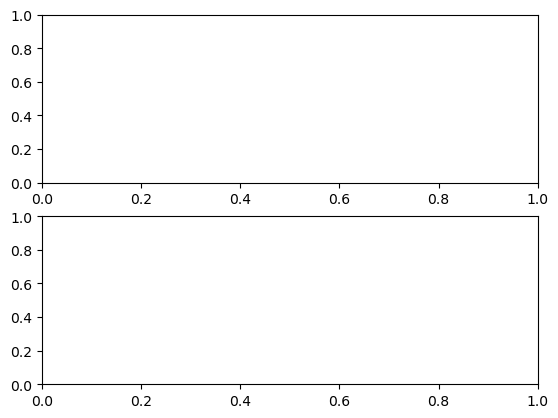

In [50]:

frames = read_video_frames_opencv(paths_to_videos_list[0])
resizer = v2.Resize(size=(224, 224), antialias=True) 
print(frames.shape)

resized_frames = resizer(frames)

print(frames.shape)
fig, axs = plt.subplots(2, 1)

# numpy
#axs[0].imshow(frames[0].transpose(1,2,0))
#axs[1].imshow(resized_frames.transpose(1,2,0))

# pytorch
axs[0].imshow(frames[0].transpose(1,2,0))
axs[1].imshow(resized_frames.transpose(1,2,0))

#plt.imshow(frames[0])

In [51]:
frames[0].transpose(1, 2, 0)

TypeError: transpose() received an invalid combination of arguments - got (int, int, int), but expected one of:
 * (int dim0, int dim1)
 * (name dim0, name dim1)


In [48]:
transforms = v2.Compose([
    #v2.ToTensor(),
    #v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transformed = transforms(frames)

transformed

array([[[[ 81,  73,  95],
         [ 81,  73,  95],
         [ 81,  73,  95],
         ...,
         [147, 153, 189],
         [147, 153, 189],
         [147, 153, 189]],

        [[ 81,  73,  95],
         [ 81,  73,  95],
         [ 81,  73,  95],
         ...,
         [147, 153, 189],
         [147, 153, 189],
         [147, 153, 189]],

        [[ 81,  73,  95],
         [ 81,  73,  95],
         [ 81,  73,  95],
         ...,
         [147, 153, 189],
         [147, 153, 189],
         [147, 153, 189]],

        ...,

        [[134, 143, 149],
         [181, 190, 196],
         [170, 179, 185],
         ...,
         [ 65,  55,  70],
         [ 73,  60,  76],
         [ 74,  61,  77]],

        [[118, 127, 133],
         [136, 145, 151],
         [133, 142, 148],
         ...,
         [ 65,  55,  70],
         [ 68,  55,  71],
         [ 73,  60,  76]],

        [[105, 114, 120],
         [125, 134, 140],
         [120, 129, 135],
         ...,
         [ 63,  53,  68],
        

In [45]:
horizontal_flip = v2.RandomHorizontalFlip(p=0.5)
horizontal_flip(frames)

array([[[[ 81,  73,  95],
         [ 81,  73,  95],
         [ 81,  73,  95],
         ...,
         [147, 153, 189],
         [147, 153, 189],
         [147, 153, 189]],

        [[ 81,  73,  95],
         [ 81,  73,  95],
         [ 81,  73,  95],
         ...,
         [147, 153, 189],
         [147, 153, 189],
         [147, 153, 189]],

        [[ 81,  73,  95],
         [ 81,  73,  95],
         [ 81,  73,  95],
         ...,
         [147, 153, 189],
         [147, 153, 189],
         [147, 153, 189]],

        ...,

        [[134, 143, 149],
         [181, 190, 196],
         [170, 179, 185],
         ...,
         [ 65,  55,  70],
         [ 73,  60,  76],
         [ 74,  61,  77]],

        [[118, 127, 133],
         [136, 145, 151],
         [133, 142, 148],
         ...,
         [ 65,  55,  70],
         [ 68,  55,  71],
         [ 73,  60,  76]],

        [[105, 114, 120],
         [125, 134, 140],
         [120, 129, 135],
         ...,
         [ 63,  53,  68],
        

In [25]:
np.expand_dims(frames, axis=0).shape

(1, 301, 270, 480, 3)

In [40]:
v2.ToTensor()(frames[0])

tensor([[[0.3176, 0.3176, 0.3176,  ..., 0.5765, 0.5765, 0.5765],
         [0.3176, 0.3176, 0.3176,  ..., 0.5765, 0.5765, 0.5765],
         [0.3176, 0.3176, 0.3176,  ..., 0.5765, 0.5765, 0.5765],
         ...,
         [0.5255, 0.7098, 0.6667,  ..., 0.2549, 0.2863, 0.2902],
         [0.4627, 0.5333, 0.5216,  ..., 0.2549, 0.2667, 0.2863],
         [0.4118, 0.4902, 0.4706,  ..., 0.2471, 0.2627, 0.2784]],

        [[0.2863, 0.2863, 0.2863,  ..., 0.6000, 0.6000, 0.6000],
         [0.2863, 0.2863, 0.2863,  ..., 0.6000, 0.6000, 0.6000],
         [0.2863, 0.2863, 0.2863,  ..., 0.6000, 0.6000, 0.6000],
         ...,
         [0.5608, 0.7451, 0.7020,  ..., 0.2157, 0.2353, 0.2392],
         [0.4980, 0.5686, 0.5569,  ..., 0.2157, 0.2157, 0.2353],
         [0.4471, 0.5255, 0.5059,  ..., 0.2078, 0.2118, 0.2275]],

        [[0.3725, 0.3725, 0.3725,  ..., 0.7412, 0.7412, 0.7412],
         [0.3725, 0.3725, 0.3725,  ..., 0.7412, 0.7412, 0.7412],
         [0.3725, 0.3725, 0.3725,  ..., 0.7412, 0.7412, 0.

In [18]:
frames.shape

(301, 270, 480, 3)

In [6]:
c

{'video_fps': 30.0, 'audio_fps': 44100}